In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_excel('fıstık.xlsx')

In [3]:
data

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,...,20.8474,20.8118,21.1175,-0.6994,-0.7071,-0.6963,2.8853,2.6599,2.6317,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,...,21.2621,22.5004,21.5821,-0.5567,-0.4968,-0.6597,2.3022,2.2664,2.5161,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,...,21.1262,20.0279,17.4401,-0.9072,-0.8790,-0.4470,3.3112,3.4306,3.0697,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,...,19.3274,19.1782,19.8930,-0.9473,-0.8404,-0.3153,3.4237,2.9606,3.0033,Siirt_Pistachio


In [4]:
data.sample(5)

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
943,41636,967.3920,367.0294,155.3820,0.9060,230.2447,0.9023,46144,0.6322,2.3621,...,20.7202,21.8764,21.5736,-0.4042,-0.1402,-0.1588,2.8642,2.7678,2.8697,Kirmizi_Pistachio
1672,88835,2115.2261,456.2918,254.1708,0.8305,336.3157,0.9458,93926,0.6745,1.7952,...,16.4267,16.2529,11.1971,-1.2250,-1.2235,-0.5414,3.8232,4.0296,4.7000,Siirt_Pistachio
1657,84000,1195.9420,442.6494,245.3055,0.8324,327.0353,0.9701,86587,0.7237,1.8045,...,17.5064,17.9853,19.9515,-0.7886,-0.4851,0.2832,3.2592,2.9349,3.9336,Siirt_Pistachio
1840,81048,1403.7860,484.8200,217.1142,0.8941,321.2375,0.9582,84587,0.7261,2.2330,...,24.4404,26.9185,26.9236,-0.4446,-0.3877,-0.0236,2.0259,2.0042,1.8590,Siirt_Pistachio
1751,97758,1320.0560,473.6430,269.8113,0.8219,352.8022,0.9513,102764,0.7700,1.7555,...,24.8473,26.4177,23.6857,-1.2336,-1.0371,-0.8430,3.5226,3.0289,2.8696,Siirt_Pistachio


In [5]:
data['Class']

0       Kirmizi_Pistachio
1       Kirmizi_Pistachio
2       Kirmizi_Pistachio
3       Kirmizi_Pistachio
4       Kirmizi_Pistachio
              ...        
2143      Siirt_Pistachio
2144      Siirt_Pistachio
2145      Siirt_Pistachio
2146      Siirt_Pistachio
2147      Siirt_Pistachio
Name: Class, Length: 2148, dtype: object

In [6]:
#data.drop_duplicates()

In [7]:
data.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_Axis     2148 non-null   float64
 3   Minor_Axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Convex_Area    2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Mean_RR        2148 non-null   float64
 17  Mean_RG        2148 non-null   float64
 18  Mean_RB 

In [9]:
data.shape

(2148, 29)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,2148.0,79950.655493,13121.737799,29808.0000,71936.750000,79905.50000,89030.500000,124008.0000
Perimeter,2148.0,1425.971751,375.565503,858.3630,1170.996250,1262.78550,1607.906250,2755.0491
Major_Axis,2148.0,446.248968,32.445304,320.3445,426.508750,448.57475,468.509400,541.9661
Minor_Axis,2148.0,238.311842,30.310695,133.5096,217.875825,236.41635,257.760150,383.0461
Eccentricity,2148.0,0.840219,0.048759,0.5049,0.817500,0.84965,0.875200,0.9460
Eqdiasq,2148.0,317.919173,26.908600,194.8146,302.642850,318.96530,336.685525,397.3561
Solidity,2148.0,0.940093,0.050452,0.5880,0.919850,0.95415,0.976925,0.9951
Convex_Area,2148.0,85015.839851,13154.919327,37935.0000,76467.000000,85075.50000,93893.500000,132478.0000
Extent,2148.0,0.716067,0.052532,0.4272,0.687000,0.72650,0.753600,0.8204
Aspect_Ratio,2148.0,1.898154,0.240100,1.1585,1.736375,1.89625,2.067025,3.0858


In [11]:
data.isnull().sum()

Area             0
Perimeter        0
Major_Axis       0
Minor_Axis       0
Eccentricity     0
Eqdiasq          0
Solidity         0
Convex_Area      0
Extent           0
Aspect_Ratio     0
Roundness        0
Compactness      0
Shapefactor_1    0
Shapefactor_2    0
Shapefactor_3    0
Shapefactor_4    0
Mean_RR          0
Mean_RG          0
Mean_RB          0
StdDev_RR        0
StdDev_RG        0
StdDev_RB        0
Skew_RR          0
Skew_RG          0
Skew_RB          0
Kurtosis_RR      0
Kurtosis_RG      0
Kurtosis_RB      0
Class            0
dtype: int64

In [12]:
data['Class'].unique()

array(['Kirmizi_Pistachio', 'Siirt_Pistachio'], dtype=object)

In [13]:
data["Class"].value_counts()

Class
Kirmizi_Pistachio    1232
Siirt_Pistachio       916
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

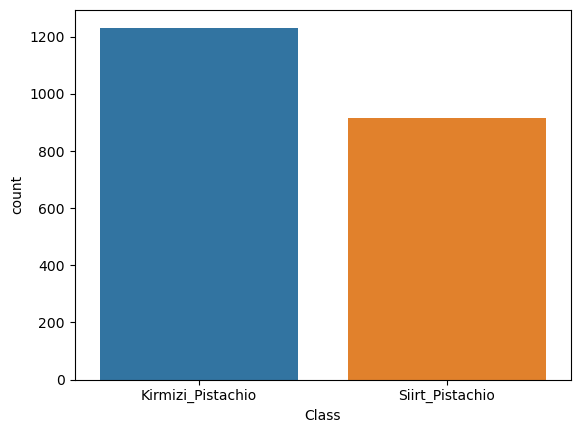

In [14]:
sns.countplot(x='Class', data = data)

In [15]:
labelencoder = LabelEncoder()
data["Class"] = labelencoder.fit_transform(data['Class'])

In [16]:
data.corr()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
Area,1.000000,0.115941,0.697782,0.795881,-0.358892,0.997399,0.363959,0.943877,0.331784,-0.424025,...,0.024021,0.032112,-0.030652,-0.375466,-0.375748,-0.193497,0.216112,0.135427,-0.030522,0.589226
Perimeter,0.115941,1.000000,0.094296,0.390740,-0.334483,0.113631,-0.671046,0.364474,-0.403916,-0.312373,...,0.058104,0.126536,0.022171,0.197617,0.129641,0.057866,-0.246827,-0.190720,-0.081029,0.145290
Major_Axis,0.697782,0.094296,1.000000,0.272578,0.298836,0.705333,0.247822,0.661892,0.186830,0.265049,...,0.057641,0.046191,0.065028,-0.273309,-0.246175,-0.120786,0.206791,0.150055,0.016733,0.136845
Minor_Axis,0.795881,0.390740,0.272578,1.000000,-0.816731,0.793155,-0.085556,0.890003,0.047442,-0.839078,...,0.023901,0.061692,-0.071212,-0.237843,-0.277873,-0.149111,0.059061,0.015342,-0.096175,0.668126
Eccentricity,-0.358892,-0.334483,0.298836,-0.816731,1.000000,-0.352723,0.257060,-0.482713,0.080967,0.943751,...,0.026200,-0.018774,0.116054,0.064266,0.118885,0.061233,0.055586,0.060771,0.091782,-0.546759
Eqdiasq,0.997399,0.113631,0.705333,0.793155,-0.352723,1.000000,0.372779,0.940651,0.340073,-0.423318,...,0.039178,0.045066,-0.017884,-0.383692,-0.383335,-0.197613,0.212359,0.130611,-0.038081,0.577300
Solidity,0.363959,-0.671046,0.247822,-0.085556,0.257060,0.372779,1.000000,0.042000,0.678599,0.177830,...,-0.026426,-0.085937,-0.024788,-0.367507,-0.304009,-0.145714,0.315469,0.223997,0.053262,0.125347
Convex_Area,0.943877,0.364474,0.661892,0.890003,-0.482713,0.940651,0.042000,1.000000,0.122881,-0.522637,...,0.041743,0.071479,-0.019823,-0.282384,-0.305124,-0.162942,0.117510,0.061541,-0.057531,0.584618
Extent,0.331784,-0.403916,0.186830,0.047442,0.080967,0.340073,0.678599,0.122881,1.000000,0.023303,...,0.092330,0.047355,0.049950,-0.275952,-0.247209,-0.153359,0.138206,0.059725,-0.052924,0.100200
Aspect_Ratio,-0.424025,-0.312373,0.265049,-0.839078,0.943751,-0.423318,0.177830,-0.522637,0.023303,1.000000,...,-0.025651,-0.061186,0.081160,0.111716,0.163461,0.095188,0.051779,0.069905,0.120274,-0.581469


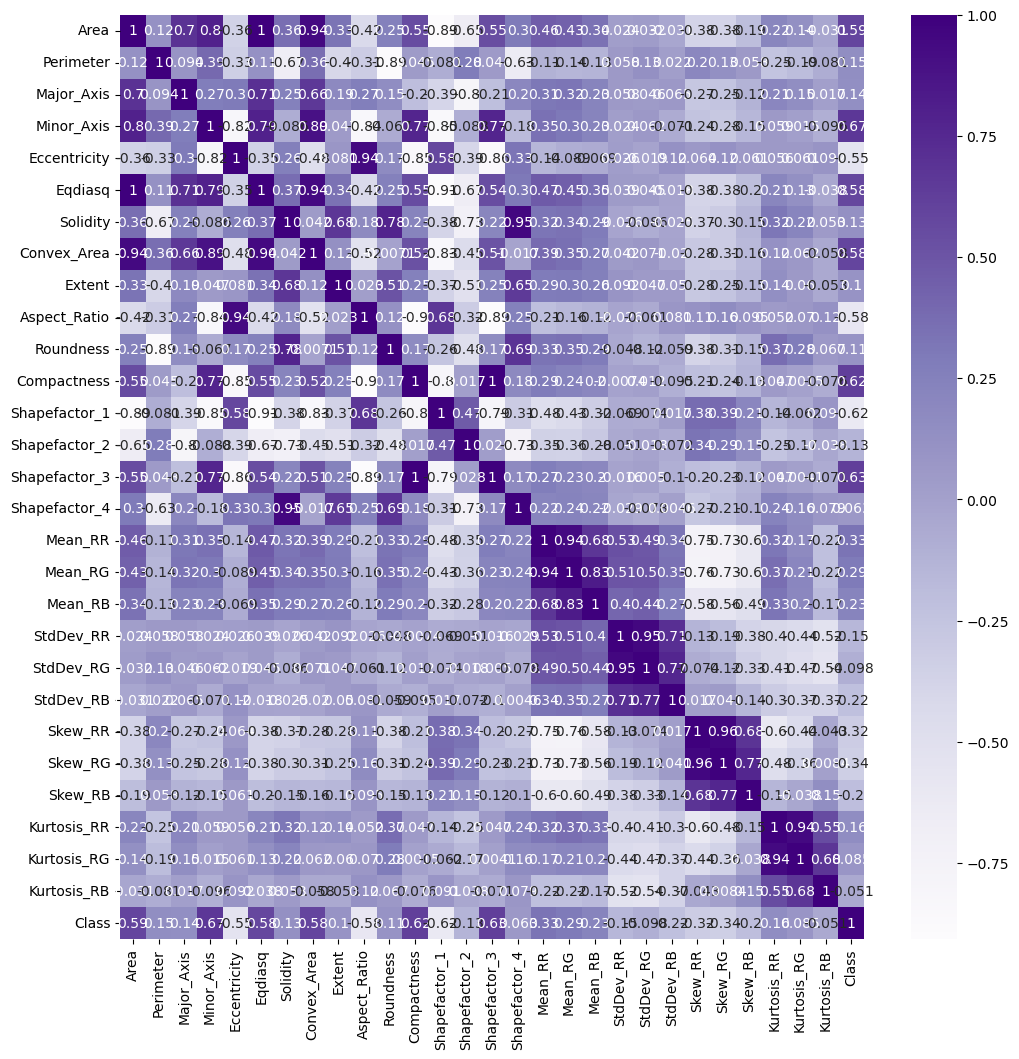

In [17]:
#data.corr #corelasyon matrisi
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Purples)
plt.show()

In [18]:
data = data.drop_duplicates()

In [19]:
x = data.iloc[:,0:28]#bağımsız değişken
y = data.iloc[:,28:]#bağımlı değişken,tahmin değeri,class

In [20]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
2143,1
2144,1
2145,1
2146,1


In [21]:
x

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,Mean_RB,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,165.3167,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,187.3744,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,187.7118,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,187.9537,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,194.4906,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,...,167.9611,20.8474,20.8118,21.1175,-0.6994,-0.7071,-0.6963,2.8853,2.6599,2.6317
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,...,176.5908,21.2621,22.5004,21.5821,-0.5567,-0.4968,-0.6597,2.3022,2.2664,2.5161
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,...,176.3508,21.1262,20.0279,17.4401,-0.9072,-0.8790,-0.4470,3.3112,3.4306,3.0697
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,...,180.9608,19.3274,19.1782,19.8930,-0.9473,-0.8404,-0.3153,3.4237,2.9606,3.0033


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

In [23]:
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

# KNN 

In [24]:
knn = KNeighborsClassifier(n_neighbors = 35,metric = 'manhattan')
knn.fit(x_train,y_train.values.ravel())
y_predict = knn.predict(x_test)

In [25]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9055007052186178

In [26]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[378,  37],
       [ 30, 264]], dtype=int64)

In [27]:
knn = KNeighborsClassifier(n_neighbors = 35,metric = 'minkowski')
knn.fit(x_train,y_train.values.ravel())
y_predict = knn.predict(x_test)

In [28]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9040902679830748

In [29]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[378,  37],
       [ 31, 263]], dtype=int64)

# GAUSSİANNAİVEBAYES

In [30]:
gnb = GaussianNB()
gnb.fit(x_train,y_train.values.ravel())
y_predict = gnb.predict(x_test)

In [31]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8730606488011283

In [32]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[347,  68],
       [ 22, 272]], dtype=int64)

# LOGİSTİC REGRESSİON

In [33]:
logisticreg = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000)
logisticreg.fit(x_train,y_train.values.ravel())
y_predict = logisticreg.predict(x_test)

In [34]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9280677009873061

In [35]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[382,  33],
       [ 18, 276]], dtype=int64)

# SUPPORT VECTOR MACHİNE

In [36]:
supportvector = SVC(kernel="rbf")
supportvector.fit(x_train,y_train.values.ravel())
y_predict = supportvector.predict(x_test)

In [37]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9365303244005642

In [38]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[387,  28],
       [ 17, 277]], dtype=int64)

# RANDOM FOREST

In [39]:
randomforest = RandomForestClassifier(criterion = 'entropy',n_estimators = 10,random_state = 42)
randomforest.fit(x_train,y_train.values.ravel())
y_predict = randomforest.predict(x_test)

In [40]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8970380818053597

In [41]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[385,  30],
       [ 43, 251]], dtype=int64)

# DECİSİON TREE

In [42]:
decisiontree = DecisionTreeClassifier(criterion = 'entropy',random_state=42)
decisiontree.fit(x_train,y_train.values.ravel())
y_predict = decisiontree.predict(x_test)

In [43]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8504936530324401

In [44]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[360,  55],
       [ 51, 243]], dtype=int64)

# BOYUT İNDİRGEME

In [45]:
pca = PCA(n_components=8)
pca.fit(x)
x_pca = pca.transform(x)
transformed_data = pd.DataFrame(x_pca)

In [46]:
x = transformed_data
x

,0,1,2,3,4,5,6,7
0,20087.392990,3361.672263,58.540363,32.162045,31.614381,-0.903251,0.728175,-4.375548
1,13157.476096,3286.859643,-288.445708,17.867665,-13.135173,-8.147238,-4.140676,0.379446
2,7878.939350,1110.617826,240.429368,-20.470919,5.211596,1.611221,1.972310,2.235499
3,13936.987611,-1394.592180,-214.915415,2.388804,1.877845,-0.231508,-0.325211,-2.711977
4,1382.171285,-1578.945247,26.096162,-25.582049,-11.589405,-7.698290,0.656765,1.484687
...,...,...,...,...,...,...,...,...
2143,-6042.758231,-2508.378321,74.441807,14.169983,26.917582,-15.718092,-0.463216,-1.239350
2144,-12146.232526,4061.301912,-478.479190,22.284220,14.362039,-6.493060,2.268276,-4.346523
2145,-27187.249165,-2821.326870,53.570376,7.076525,26.762825,-10.009648,-0.270372,2.786211
2146,-21786.653918,-2945.893483,75.993363,26.972472,21.315996,-8.347699,0.745864,1.129738


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

In [48]:
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

# KNN BOYUT İNDİRGEME

In [49]:
knn = KNeighborsClassifier(n_neighbors = 35,metric = 'manhattan')
knn.fit(x_train,y_train.values.ravel())
y_predict = knn.predict(x_test)

In [50]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8956276445698167

In [51]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[380,  35],
       [ 39, 255]], dtype=int64)

In [52]:
knn = KNeighborsClassifier(n_neighbors = 35,metric = 'minkowski')
knn.fit(x_train,y_train.values.ravel())
y_predict = knn.predict(x_test)

In [53]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9012693935119888

In [54]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[385,  30],
       [ 40, 254]], dtype=int64)

# GAUSSİANNAİVEBAYES BOYUT İNDİRGEME

In [55]:
gnb = GaussianNB()
gnb.fit(x_train,y_train.values.ravel())
y_predict = gnb.predict(x_test)

In [56]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8772919605077574

# LOGİSTİC REGRESSİON BOYUT İNDİRGEME

In [57]:
logisticreg = LogisticRegression(random_state=0,solver='lbfgs', max_iter=1000)
logisticreg.fit(x_train,y_train.values.ravel())
y_predict = logisticreg.predict(x_test)

In [58]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8885754583921015

In [59]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[371,  44],
       [ 35, 259]], dtype=int64)

# SUPPORT VECTOR MACHİNE BOYUT İNDİRGEME

In [60]:
supportvector = SVC(kernel="rbf")
supportvector.fit(x_train,y_train.values.ravel())
y_predict = supportvector.predict(x_test)

In [61]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9012693935119888

In [62]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[377,  38],
       [ 32, 262]], dtype=int64)

# RANDOM FOREST BOYUT İNDİRGEME

In [63]:
randomforest = RandomForestClassifier(criterion = 'entropy',n_estimators = 10,random_state = 42)
randomforest.fit(x_train,y_train.values.ravel())
y_predict = randomforest.predict(x_test)

In [64]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8688293370944993

In [65]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[372,  43],
       [ 50, 244]], dtype=int64)

# DECİSİON TREE BOYUT İNDİRGEME

In [66]:
decisiontree = DecisionTreeClassifier(criterion = 'entropy',random_state=42)
decisiontree.fit(x_train,y_train.values.ravel())
y_predict = decisiontree.predict(x_test)

In [67]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.8110014104372355

In [68]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[344,  71],
       [ 63, 231]], dtype=int64)